#📌 Preparação dos dados


In [19]:
import pandas as pd
import ast

# Carregar o arquivo CSV
df = pd.read_csv('dados_tratados.csv')
print(f'Linhas após carregamento: {df.shape[0]}')
print(df.head())

# Expandir colunas que são dicionários (convertendo string para dict)
cols_to_expand = ['customer', 'phone', 'internet', 'account']

for col in cols_to_expand:
    if col in df.columns:
        df[col] = df[col].apply(ast.literal_eval)
        expanded = pd.json_normalize(df[col])
        df = df.drop(columns=[col]).join(expanded)
    else:
        print(f"Coluna '{col}' não encontrada. Pulando.")

print(f'Linhas após expandir colunas: {df.shape[0]}')
print(df.head())

# Verificar nulos em 'Churn'
print(f"Nulos em 'Churn': {df['Churn'].isnull().sum()}")
print(df['Churn'].value_counts(dropna=False))

# Tratar nulos na variável alvo
df = df.dropna(subset=['Churn'])
print(f'Linhas após remover nulos em Churn: {df.shape[0]}')

Linhas após carregamento: 7267
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber o

In [22]:
import pandas as pd
import ast

# Carregar o arquivo CSV
df = pd.read_csv('dados_tratados.csv')
print(f'Linhas após carregamento: {df.shape[0]}')
print(df.head())

# Expandir colunas que são dicionários (convertendo string para dict)
cols_to_expand = ['customer', 'phone', 'internet', 'account']

for col in cols_to_expand:
    if col in df.columns:
        df[col] = df[col].apply(ast.literal_eval)
        expanded = pd.json_normalize(df[col])
        df = df.drop(columns=[col]).join(expanded)
    else:
        print(f"Coluna '{col}' não encontrada. Pulando.")

print(f'Linhas após expandir colunas: {df.shape[0]}')
print(df.head())

# Verificar nulos em 'Churn'
print(f"Nulos em 'Churn': {df['Churn'].isnull().sum()}")
print(df['Churn'].value_counts(dropna=False))

# Tratar nulos na variável alvo
df = df.dropna(subset=['Churn'])
print(f'Linhas após remover nulos em Churn: {df.shape[0]}')

# Converter Churn para numérico
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Conferir tipos para identificar categóricas
print(df.dtypes)

# Identificar colunas categóricas para encoding
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Colunas categóricas: {cat_cols}')

# Remover customerID antes do encoding
df = df.drop(columns=['customerID'])

# Converter Charges.Total para numérico (float), forçando erros a NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Remover linhas com NaN em Charges.Total (se houver)
df = df.dropna(subset=['Charges.Total'])

# Re-identificar colunas categóricas (objeto)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Aplicar one-hot encoding nas categóricas
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Preencher possíveis NaNs e converter para int
df_encoded = df_encoded.fillna(0)
df_encoded = df_encoded.astype(int, errors='ignore')

print(df_encoded.head())
print(f'Número total de colunas após encoding: {df_encoded.shape[1]}')
print(f'Número total de linhas após encoding: {df_encoded.shape[0]}')


# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Tratar possíveis NaNs após encoding e converter para int
df_encoded = df_encoded.fillna(0)
df_encoded = df_encoded.astype(int, errors='ignore')

print(df_encoded.head())
print(f'Número total de colunas após encoding: {df_encoded.shape[1]}')
print(f'Número total de linhas após encoding: {df_encoded.shape[0]}')


Linhas após carregamento: 7267
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber o

In [24]:
# Verificar a proporção da Evasão

# Contar a quantidade de clientes que evadiram e que permaneceram
churn_counts = df_encoded['Churn'].value_counts()

# Calcular a proporção (em %) de cada classe
churn_proportion = churn_counts / churn_counts.sum() * 100

print("Contagem de clientes por classe de churn:")
print(churn_counts)
print("\nProporção percentual de clientes por classe de churn:")
print(churn_proportion)


Contagem de clientes por classe de churn:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proporção percentual de clientes por classe de churn:
Churn
0    73.421502
1    26.578498
Name: count, dtype: float64


In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Separar variáveis preditoras e alvo
X = df_encoded.drop('Churn', axis=1)  # ajuste aqui para 'Churn'
y = df_encoded['Churn']

# 2. Dividir dados em treino e teste (ex: 70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar proporção após SMOTE
print('Antes SMOTE:', y_train.value_counts(normalize=True))
print('Depois SMOTE:', y_train_res.value_counts(normalize=True))


Antes SMOTE: Churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64
Depois SMOTE: Churn
1    0.5
0    0.5
Name: proportion, dtype: float64


#🎯 Correlação e Seleção de Variáveis

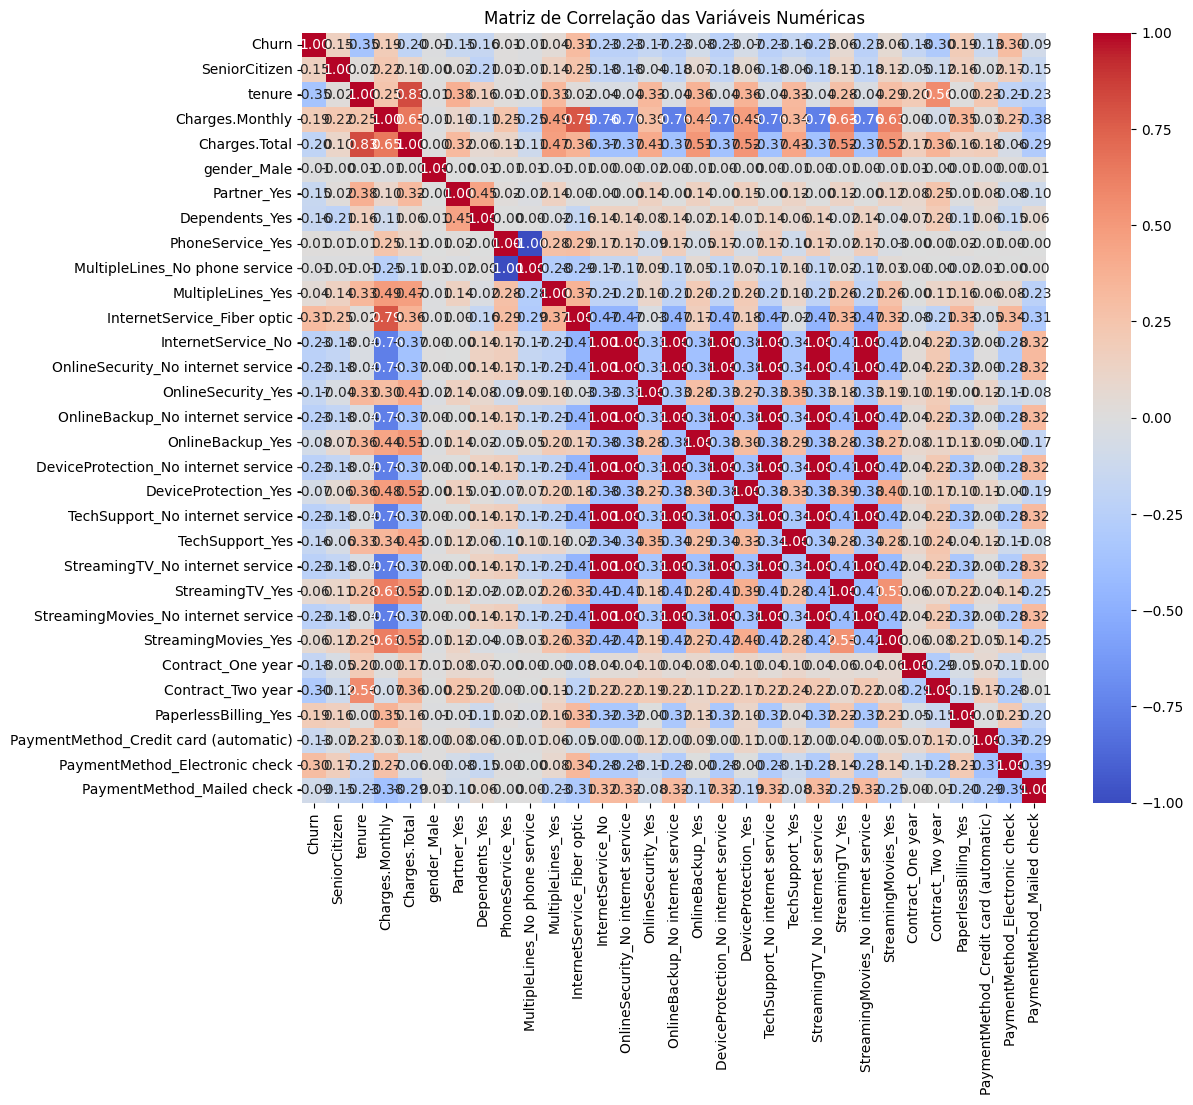

In [27]:
#passo 2.1 - Analise de correlação
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona as colunas numéricas (incluindo Churn)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Calcula matriz de correlação entre as numéricas
corr_matrix = df_encoded[numerical_cols].corr()

# Configura o tamanho da figura
plt.figure(figsize=(12, 10))

# Desenha heatmap da correlação com anotação dos valores
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


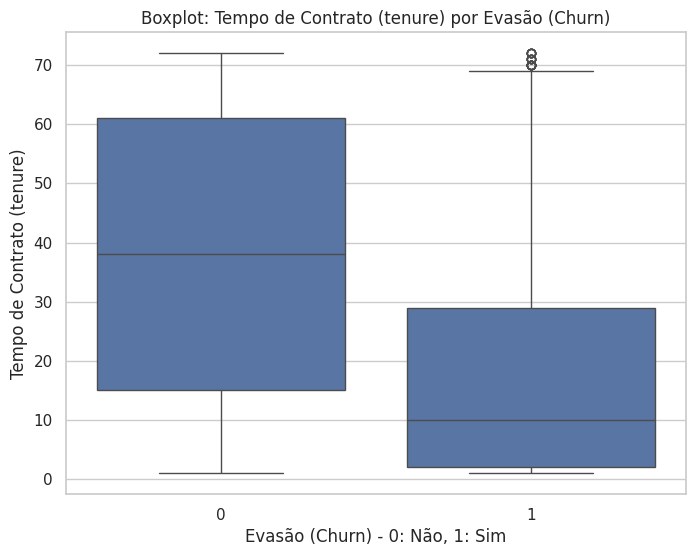

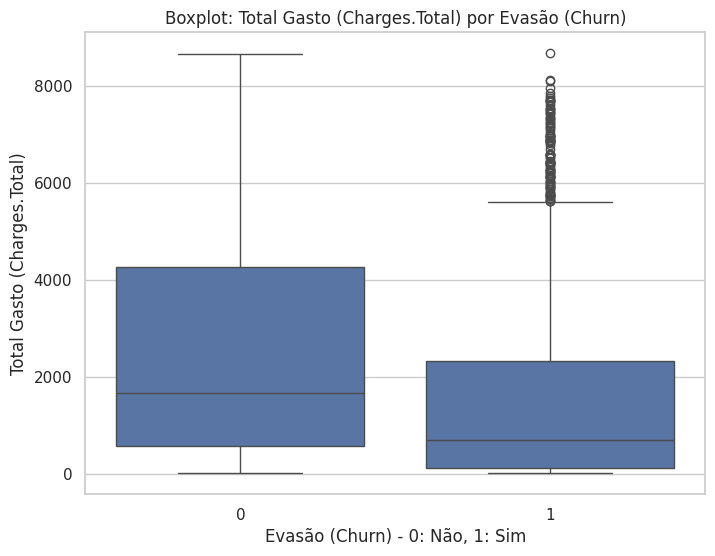

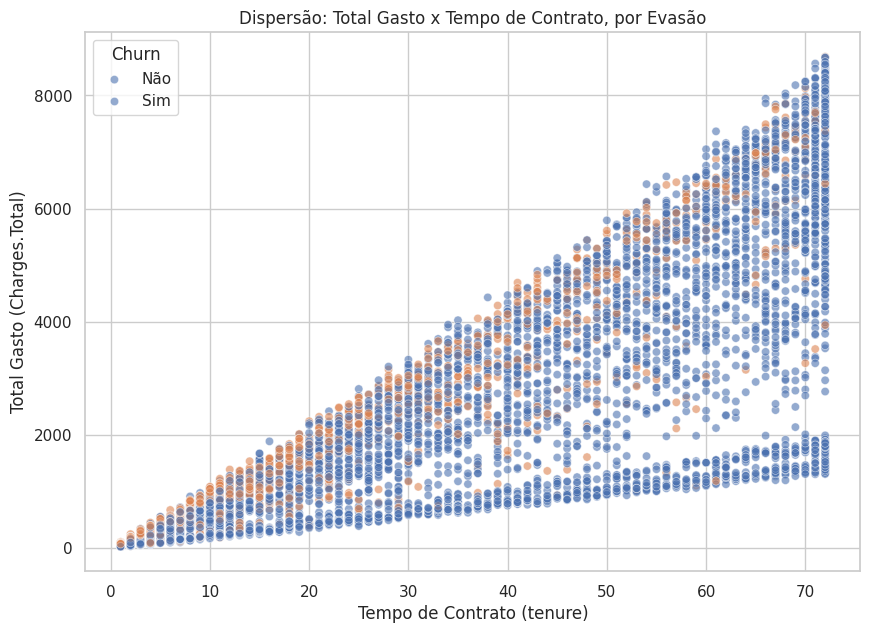

In [29]:
# Passo 2.2 - Analise direcionada

import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste visual dos gráficos
sns.set(style="whitegrid")

# Boxplot: Tempo de contrato vs Evasão
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='tenure', data=df_encoded)
plt.title('Boxplot: Tempo de Contrato (tenure) por Evasão (Churn)')
plt.xlabel('Evasão (Churn) - 0: Não, 1: Sim')
plt.ylabel('Tempo de Contrato (tenure)')
plt.show()

# Boxplot: Total gasto vs Evasão
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='Charges.Total', data=df_encoded)
plt.title('Boxplot: Total Gasto (Charges.Total) por Evasão (Churn)')
plt.xlabel('Evasão (Churn) - 0: Não, 1: Sim')
plt.ylabel('Total Gasto (Charges.Total)')
plt.show()

# Scatter plot (dispersão) para observar tendência Total Gasto x Tempo de contrato, colorido por Churn
plt.figure(figsize=(10,7))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df_encoded, alpha=0.6)
plt.title('Dispersão: Total Gasto x Tempo de Contrato, por Evasão')
plt.xlabel('Tempo de Contrato (tenure)')
plt.ylabel('Total Gasto (Charges.Total)')
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()


In [30]:
# Estatísticas do tempo de contrato por grupo Churn
tenure_stats = df_encoded.groupby('Churn')['tenure'].describe()
print("Estatísticas do Tempo de Contrato (tenure) por Evasão (Churn):")
print(tenure_stats)

# Estatísticas do total gasto por grupo Churn
charges_stats = df_encoded.groupby('Churn')['Charges.Total'].describe()
print("\nEstatísticas do Total Gasto (Charges.Total) por Evasão (Churn):")
print(charges_stats)


Estatísticas do Tempo de Contrato (tenure) por Evasão (Churn):
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

Estatísticas do Total Gasto (Charges.Total) por Evasão (Churn):
        count         mean          std   min    25%     50%     75%     max
Churn                                                                       
0      5163.0  2554.875266  2329.452462  18.0  577.5  1683.0  4264.0  8672.0
1      1869.0  1531.323167  1890.823820  18.0  134.0   703.0  2331.0  8684.0


In [31]:
# Médias
mean_stats = df_encoded.groupby('Churn')[['tenure', 'Charges.Total']].mean()
print("Médias de Tempo de Contrato e Total Gasto por Evasão:")
print(mean_stats)

# Medianas
median_stats = df_encoded.groupby('Churn')[['tenure', 'Charges.Total']].median()
print("\nMedianas de Tempo de Contrato e Total Gasto por Evasão:")
print(median_stats)


Médias de Tempo de Contrato e Total Gasto por Evasão:
          tenure  Charges.Total
Churn                          
0      37.650010    2554.875266
1      17.979133    1531.323167

Medianas de Tempo de Contrato e Total Gasto por Evasão:
       tenure  Charges.Total
Churn                       
0        38.0         1683.0
1        10.0          703.0


In [32]:
for churn_class in [0, 1]:
    corr = df_encoded[df_encoded['Churn'] == churn_class][['tenure', 'Charges.Total']].corr().iloc[0,1]
    print(f"Correlação entre Tempo de Contrato e Total Gasto para Churn = {churn_class}: {corr:.4f}")


Correlação entre Tempo de Contrato e Total Gasto para Churn = 0: 0.7932
Correlação entre Tempo de Contrato e Total Gasto para Churn = 1: 0.9540


# 🤖 Modelagem Preditiva

# 📋  Interpretação e Conclusões